In [2]:
import torch
import numpy as np
import pandas as pd
from torchvision import datasets, transforms
import helper

In [5]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,))])
trainset =  datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw




Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw




Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw




Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


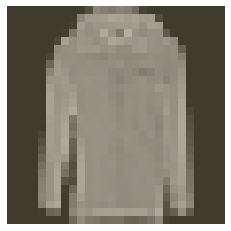

In [12]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
helper.imshow(images[4,]);

In [42]:
from torch import nn
model = nn.Sequential(nn.Linear(784,256),
                      nn.ReLU(),
                      nn.Linear(256,124),
                      nn.ReLU(),
                      nn.Linear(124,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim =1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)


In [43]:
epochs = 5

for e in range(epochs):
  running_loss=0
  for images, labels in trainloader:
    images = images.view(images.shape[0],-1)
    output = model(images)
    loss = criterion(output, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  else:
    print(f"Training loss::{running_loss/len(trainloader)}")


Training loss::0.522779000927009
Training loss::0.3937647710921668
Training loss::0.3575376798110857
Training loss::0.334113278710194
Training loss::0.3178551583799091


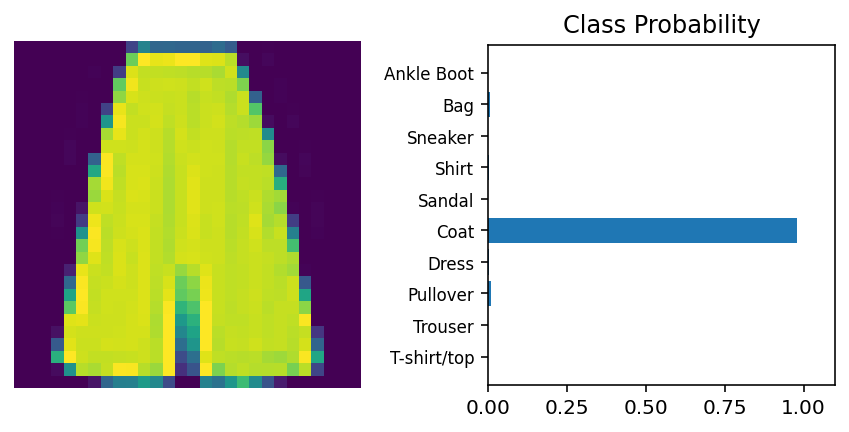

In [44]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download = True, train = False, transform= transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()

img = images[0]
img = img.view(img.shape[0],-1)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')
